# Lista7- Placa circular


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sympy as smp

In [2]:
r,theta,R,p,v,d,E,h,f,c1,c2,c3 =smp.symbols('r θ R p v d E h f c1 c2 c3')

In [3]:
E=25000000
R=5
v=0.2
h=0.3
d=E*h**3/(12*(1-v**2))
p=10
d

58593.74999999999

#### O carregamento triangular é dado em cordenadas polares por

In [4]:
f=r/R*p
f

2*r

### o volume do carregamento para um raio r é dado por papa goudin:

In [5]:

P=(f*r/2)*2*smp.pi*2/3*r
P

4*pi*r**3/3

#### O cortante é 

In [6]:
q=P/2/smp.pi
q

2*r**3/3

In [7]:
w= smp.symbols('w', cls=smp.Function)
w=w(r)
    

In [8]:
nabla2=smp.diff((smp.diff(w,r)),r)+1/r*(smp.diff(w,r))
nabla2

Derivative(w(r), (r, 2)) + Derivative(w(r), r)/r

In [9]:
qr=-d*smp.diff(nabla2,r)
qr.factor()

-58593.75*(r**2*Derivative(w(r), (r, 3)) + r*Derivative(w(r), (r, 2)) - Derivative(w(r), r))/r**2

In [10]:
int1=smp.integrate(q/d,r)
int2=smp.integrate(r*(int1),r)
int3=smp.integrate(1/r*(int2),r)
w=int3+1/4*c1*r**2+c3
int3

7.90123456790124e-8*r**6

In [11]:

wr=w.subs([(r,5)])
nabla2=smp.diff((smp.diff(w,r)),r)+1/r*(smp.diff(w,r))

m=-d*(smp.diff((smp.diff(w,r)),r)+1/r*v*(smp.diff(w,r)))
mr=m.subs([(r,5)])

g=smp.diff(w,r)
g0=g.subs([(r,0)])

mr

-35156.25*c1 - 90.2777777777778

In [12]:
sols=smp.solve([wr,mr],[c1,c3])
sols

{c1: -0.00256790123456790, c3: 0.0148148148148148}

In [13]:
C1= sols[c1]
C3= sols[c3]
wf=w.subs([(c3,C3)])
W=wf.subs([(c1,C1)])
Mr=-d*(smp.diff((smp.diff(W,r)),r)+1/r*v*(smp.diff(W,r)))
W

7.90123456790124e-8*r**6 - 0.000641975308641976*r**2 + 0.0148148148148148

In [14]:
d=E*h**3/(12*(1-v**2))
p=10
WW=smp.lambdify([r],W)
MR=smp.lambdify([r],Mr)

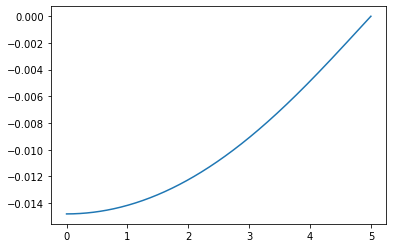

In [15]:
r1=np.linspace(0,5,500)
t=np.linspace(0,360,500)
plt.plot(r1,-WW(r1))

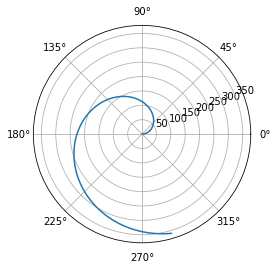

In [16]:
ax=plt.subplot(projection='polar')
ax.plot(r1,t)
ra, th = np.meshgrid(r1, t)

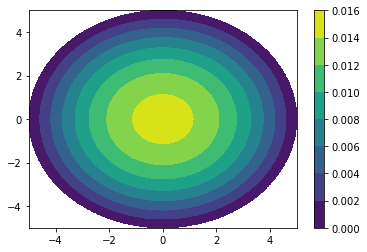

In [17]:
x1=ra*np.cos(th)
y1=ra*np.sin(th)
plt.contourf(x1,y1,WW(ra))
plt.colorbar()


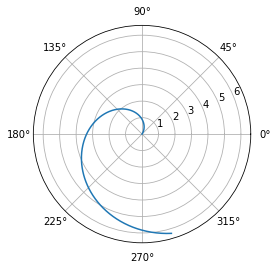

In [20]:
r1=np.linspace(1,5,500)
t=np.linspace(0,2*np.pi,500)
plt.plot(r1,-WW(r1))
ax=plt.subplot(projection='polar')
ax.plot(r1,t)
ra, th = np.meshgrid(r1, t)


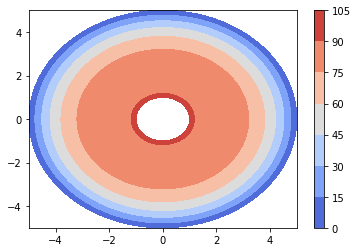

In [21]:
x1=ra*np.cos(th)
y1=ra*np.sin(th)
plt.contourf(x1,y1,MR(ra),cmap="coolwarm")
plt.colorbar()

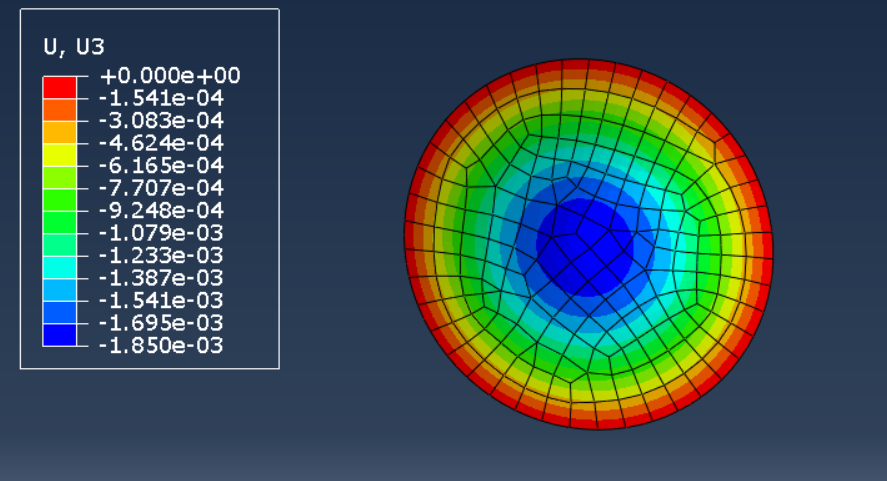


# nao e o momento radial


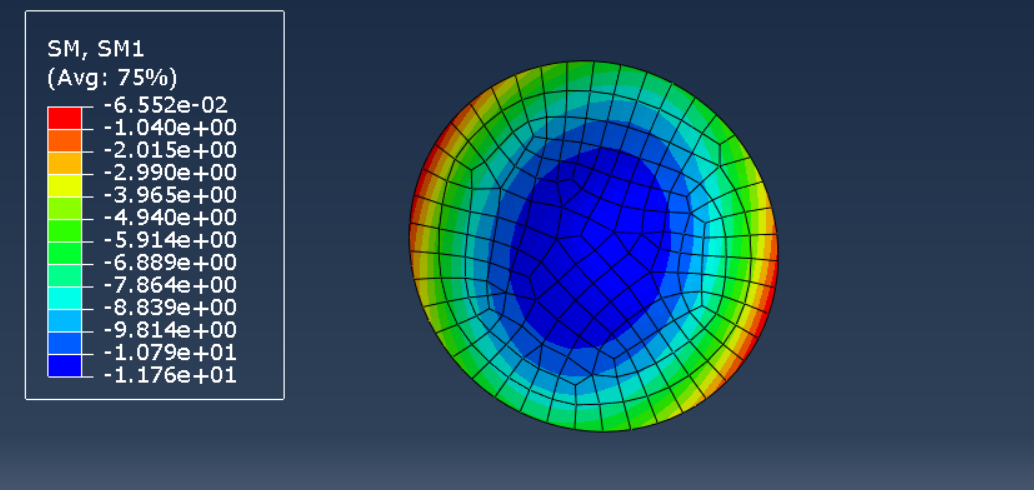